In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters

modes = ['posteriograms','eng_mfcc_env','eng_all_classall','eng_all_classred','eng_all_syllall','eng_all_syllred','eng_all_phonall','eng_all_phonred','eng_all_sound','vae','classall','classred','syllall','syllred','phonall','phonred','siamese'] # Triplet!!
#modes = ['posteriograms','eng_mfcc_env','vae','classall','classred','syllall','syllred','phonall','phonred','siamese']
#clfs = ['slp','mlp','logr','knn','rf','xgboost']#
clfs = ['knn']

list_test_participants_avp = [8,10,18,23]
list_test_participants_lvt = [0,6,7,13]

# Calculate utterance-wise weights

num_test_utterances = []
for part in list_test_participants_avp:
    if part<=9:
        test_dataset = np.load('../../data/interim/AVP/Dataset_Test_0' + str(part) + '.npy')
    else:
        test_dataset = np.load('../../data/interim/AVP/Dataset_Test_' + str(part) + '.npy')
    num_test_utterances.append(test_dataset.shape[0])
for part in list_test_participants_lvt:
    if part<=9:
        test_dataset = np.load('../../data/interim/LVT/Dataset_Test_0' + str(part) + '.npy')
    else:
        test_dataset = np.load('../../data/interim/LVT/Dataset_Test_' + str(part) + '.npy')
    num_test_utterances.append(test_dataset.shape[0])
utterance_wise_weights = num_test_utterances/np.sum(np.array(num_test_utterances))

In [3]:
# Results

for b in range(len(modes)):

    for c in range(len(clfs)):

        mode = modes[b]
        clf = clfs[c]

        accuracies_raw = np.load('../../results/' + mode + '/accuracies.npy')
        accuracies_mean = np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        accuracies_std = np.std(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        
        print([mode,clf])
        print([accuracies_mean[0],accuracies_std[0]])

['posteriograms', 'knn']
[0.4094622372025102, 0.0]
['eng_mfcc_env', 'knn']
[0.8398673133846625, 0.0]
['eng_all_classall', 'knn']
[0.8088691734906165, 0.0]
['eng_all_classred', 'knn']
[0.7345743737566472, 0.0]
['eng_all_syllall', 'knn']
[0.8511905119792026, 0.0]
['eng_all_syllred', 'knn']
[0.8529685299429783, 0.0]
['eng_all_phonall', 'knn']
[0.7860214053593844, 0.0]
['eng_all_phonred', 'knn']
[0.7359957561902973, 1.1102230246251565e-16]
['eng_all_sound', 'knn']
[0.7835371344172885, 1.1102230246251565e-16]
['vae', 'knn']
[0.7913643429727562, 0.016435930198353255]
['classall', 'knn']
[0.7882275008323933, 0.034696060382793374]
['classred', 'knn']
[0.7464649232598928, 0.053384080946540256]
['syllall', 'knn']
[0.8793587738279595, 0.02141427091828355]
['syllred', 'knn']
[0.871345899558189, 0.016091789268273628]
['phonall', 'knn']
[0.8624758812790535, 0.028784882820691814]
['phonred', 'knn']
[0.864469864216525, 0.026229714253538077]
['siamese', 'knn']
[0.8496526561833981, 0.020633613833959723]

In [4]:
# Results Utterance-Wise

for b in range(len(modes)):

    for c in range(len(clfs)):

        mode = modes[b]
        clf = clfs[c]

        accuracies_raw = np.load('../../results/' + mode + '/accuracies.npy')

        for i in range(accuracies_raw.shape[0]):
            for j in range(accuracies_raw.shape[1]):
                for k in range(accuracies_raw.shape[2]):
                    accuracies_raw[i,j,k] *= utterance_wise_weights*8

        accuracies_mean = np.mean(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        accuracies_std = np.std(np.mean(np.mean(accuracies_raw,axis=-1),axis=-1),axis=-1)
        
        print([mode,clf])
        print([accuracies_mean[0],accuracies_std[0]])

['posteriograms', 'knn']
[0.376996805111821, 5.551115123125783e-17]
['eng_mfcc_env', 'knn']
[0.8345047923322682, 0.0]
['eng_all_classall', 'knn']
[0.7712460063897764, 0.0]
['eng_all_classred', 'knn']
[0.6651757188498401, 1.1102230246251565e-16]
['eng_all_syllall', 'knn']
[0.8051118210862619, 0.0]
['eng_all_syllred', 'knn']
[0.8051118210862619, 0.0]
['eng_all_phonall', 'knn']
[0.7105431309904153, 0.0]
['eng_all_phonred', 'knn']
[0.6728434504792331, 1.1102230246251565e-16]
['eng_all_sound', 'knn']
[0.746964856230032, 0.0]
['vae', 'knn']
[0.7824920127795527, 0.01911429800555755]
['classall', 'knn']
[0.7674760383386581, 0.0329831937141115]
['classred', 'knn']
[0.7140575079872205, 0.05572255021859796]
['syllall', 'knn']
[0.8542492012779551, 0.028958379038243397]
['syllred', 'knn']
[0.8464536741214056, 0.016208004976813774]
['phonall', 'knn']
[0.8318210862619809, 0.037139719664476635]
['phonred', 'knn']
[0.8354632587859424, 0.03114680083471563]
['siamese', 'knn']
[0.8198083067092652, 0.01296

15
hhc


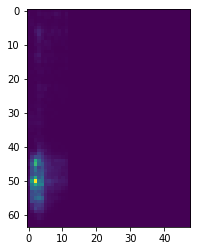

43
hho


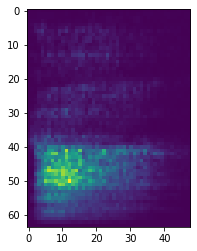

71
kd


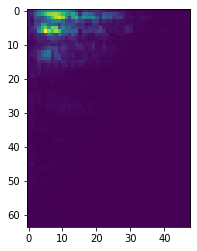

99
sd


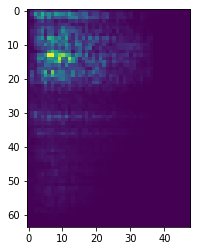

In [91]:
import matplotlib.pyplot as plt

dataset_sel = np.load('../../data/interim/AVP/Dataset_Train_03.npy')
classes_sel = np.load('../../data/interim/AVP/Classes_Train_03.npy')

const = 1
for n in range(4):
    idx = int(n*(len(classes_sel)//4)) + len(classes_sel)//8 + const
    print(idx)
    print(classes_sel[idx])
    plt.imshow(dataset_sel[idx])
    plt.show()

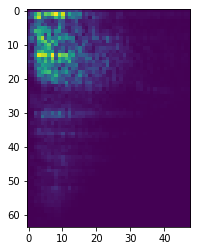

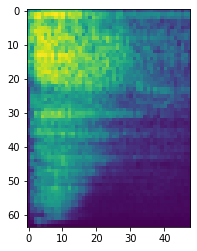

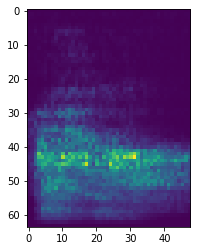

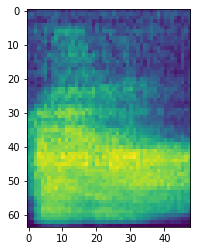

In [98]:
part_indices = ['03','03','03','04','05','06','07','09','09','10','10','10','11','11','14','14','15','15','16','18','20','23','23','24','24','25','25','25','26','27']
sound_indices = [101,48,80,25,23,23,85,73,102,13,38,63,13,63,16,47,66,92,99,95,73,66,92,18,88,16,46,76,37,127]
sound_labels = ['sd','hho','kd','hhc','hhc','hho','sd','kd','sd','hhc','hho','kd','hhc','kd','hhc','hho','kd','sd','sd','sd','kd','kd','sd','hhc','kd','hhc','hho','kd','hho','sd']

norm_min_max = [[0.0, 3.7073483668036347],[-9.210340371976182, 9.999500033329732e-05]]

for n in range(len(part_indices)):
    
    part_index = part_indices[n]
    sound_index = sound_indices[n]
    sound_label = sound_labels[n]

    # Spectrogram loading

    Spectrograms = np.load('../../data/interim/AVP/Dataset_Train_' + part_index + '.npy')
    Spectrogram = Spectrograms[sound_index]
    Label = sound_label

    # Spectrogram normalisation

    Spectrogram = (Spectrogram-norm_min_max[0][0])/(norm_min_max[0][1]-norm_min_max[0][0]+1e-16)
    Spectrogram = np.log(Spectrogram+1e-4)
    Spectrogram = (Spectrogram-norm_min_max[1][0])/(norm_min_max[1][1]-norm_min_max[1][0]+1e-16)

